# Explarotary Data Analysis

In [1]:
#import required packages
import pandas as pd
import numpy as np
import sys
sys.path.insert(0,'../scripts/')
from data_fetch import get_data
from plot import plot_hist,plot_hist_many,plot_count,plot_bar,plot_heatmap

In [2]:
train_data = get_data('data/train.csv','C:/Users/User/Desktop/Pharmaceutical-Sales-Prediction','train_v1')
test_data = get_data('data/test.csv','C:/Users/User/Desktop/Pharmaceutical-Sales-Prediction','test_v1')
store_data = get_data('data/store.csv','C:/Users/User/Desktop/Pharmaceutical-Sales-Prediction','store_v1')

C:\Users\User\AppData\Local\Temp\ipykernel_7544\2179007333.py:1: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  train_data = get_data('data/train.csv','C:/Users/User/Desktop/Pharmaceutical-Sales-Prediction','train_v1')


## Train Data

In [3]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


## Test Data

In [5]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


## Store Data

In [7]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
#set timestampe
from preprocessing import datetime

train_data['Date'] = datetime(train_data,'Date')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


### Distribution of promotions in Train data

In [12]:
timestamp_train=train_data.set_index('Date',inplace=False)
timestamp_train['Promo'].sum()

388080

### Distribution of promotions in Test data

In [13]:
test_data['Promo'].sum()

16264

#### Adding a Year, Month and Day of Month columns to our dataset

In [14]:
train_data['Year'] =  train_data['Date'].apply(lambda x: x.year)
train_data['Month'] = train_data['Date'].apply(lambda x: x.month)
train_data['DayOfMonth'] = train_data['Date'].apply(lambda x: x.day)

### Distribution of total sales across holidays

We can see from the below data that holidays have the highest sales volume while Christmas has the lowest volume of sales

In [15]:
holidays= train_data[ train_data['StateHoliday'].isin(['a','b','c'])]
holidays.groupby('StateHoliday')['Sales'].sum()

StateHoliday
a    5890305
b    1433744
c     691806
Name: Sales, dtype: int64

<AxesSubplot:xlabel='StateHoliday'>

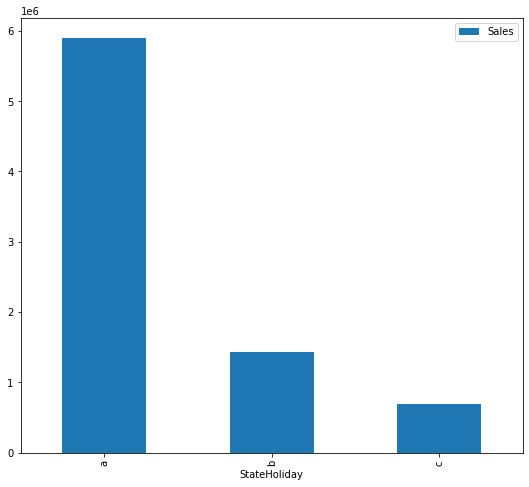

In [16]:
holidays.groupby('StateHoliday').agg({'Sales':'sum'}).plot(kind='bar',figsize=(9, 8))

### Distribution of total sales across multiple years

The year with the least amount of sales was 2015 and the year with highest amountn of sales was 2014

<AxesSubplot:xlabel='Year'>

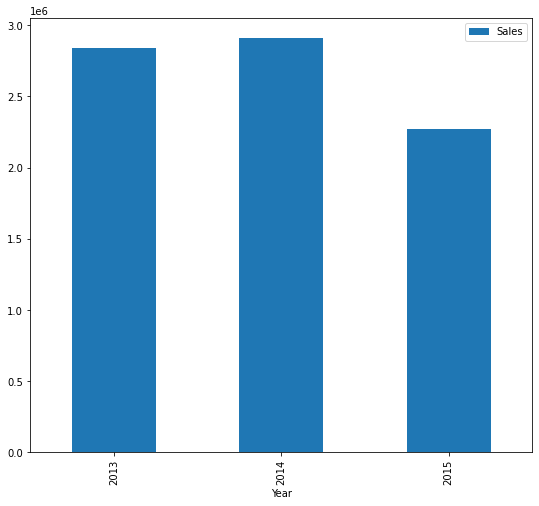

In [17]:
holidays.groupby('Year').agg({'Sales':'sum'}).plot(kind='bar',figsize=(9, 8))

#### Merging our Store and Train data sets for analysis

In [19]:
merged_data = train_data.merge(store_data,on='Store')

### Correlation of promotions, sales and customers

From the correalation matrix below we have observed that Promotion has a positve correalation with both sales and customers which means that when ever there is a promotion both sales and customers see an up-tick.

In [20]:
sales_promo_rln = merged_data.loc[:,['Sales','Promo','Customers']]
sales_promo_corr = sales_promo_rln.corr()
sales_promo_corr

,Sales,Promo,Customers
Sales,1.000000,0.452345,0.894711
Promo,0.452345,1.000000,0.316169
Customers,0.894711,0.316169,1.000000


## There is an increase of sales volume and customers number when there is a promotion

### Total amount of sales and total number of customers recorded during a promotion

In [23]:
train_data[train_data['Promo']==1].agg({'Sales':'sum','Customers':'sum'})

Sales        3101206286
Customers     318263948
dtype: int64

### Total amount of sales and total number of customers recorded when there was no promotion

In [24]:
train_data[train_data['Promo']==0].agg({'Sales':'sum','Customers':'sum'})

Sales        2771974337
Customers     325777807
dtype: int64

## Stores open during the weekends

In [30]:
weekend=merged_data[merged_data['DayOfWeek']>5]
weekend[weekend['Open']==1]['Store']

6             1
13            1
20            1
27            1
34            1
           ... 
1017176    1115
1017183    1115
1017190    1115
1017197    1115
1017204    1115
Name: Store, Length: 147651, dtype: int64

## Total amount of sales of stores open during the weekends

In [31]:
weekend[weekend['Open']==1].agg({'Sales':'sum','Customers':'sum'})

Sales        875869168
Customers    100283280
dtype: int64

## Total amount of sales across multiple assortments

We can see that assortment type b has the least amount of sales while assortment types a and c have roughly the same amount of sales.

<AxesSubplot:xlabel='Assortment'>

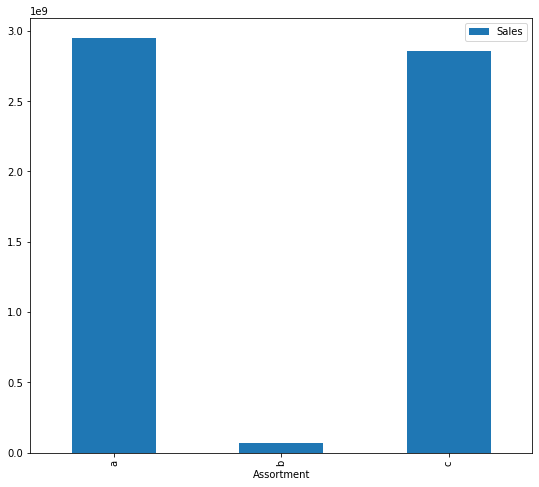

In [33]:
merged_data.groupby('Assortment').agg({'Sales':'sum'}).plot(kind='bar',figsize=(9, 8))

### Correlation of Competition distance, sales and customers

Competition distance has a negative correlation with the total amount of sales and the total number of custormers which means that when ever there is a competitor nearby both sales and number of customers have a down-turn.

In [34]:
sales_CompetitionDistance = merged_data.loc[:,['Sales','CompetitionDistance','Customers']]
sales_CompetitionDistance_corr = sales_CompetitionDistance.corr()
sales_CompetitionDistance_corr


,Sales,CompetitionDistance,Customers
Sales,1.000000,-0.019229,0.894711
CompetitionDistance,-0.019229,1.000000,-0.102861
Customers,0.894711,-0.102861,1.000000


### Stores with the highest volumes of Sales.

In [47]:
merged_data.groupby('Store').agg({'Sales':'sum'}).sort_values(by='Sales',ascending=False)

,Sales
Store,
262,19516842
817,17057867
562,16927322
1114,16202585
251,14896870
...,...
263,2306075
208,2302052
198,2268273


### Total amount of sales across different store types.

From the figure below we can see the store with type a has the highest sells volume while stores with type b has the lowest volume of sells.

<AxesSubplot:xlabel='StoreType'>

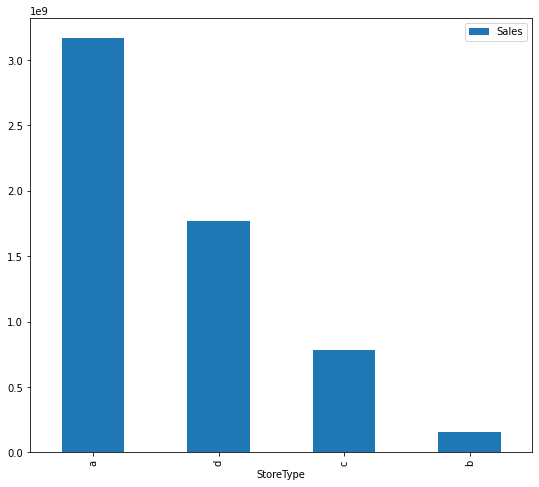

In [46]:
merged_data.groupby('StoreType').agg({'Sales':'sum'}).sort_values(by='Sales',ascending=False).plot(kind='bar',figsize=(9, 8))

In [50]:
import mlflow,os

mlflow.set_experiment("Explarotary Data Analysis")

if not os.path.exists("EDA"):
            os.makedirs("EDA")
with open("EDA/report.txt", "w") as f:
            f.write(str(sales_promo_corr))
mlflow.log_artifacts("EDA")

